---
**Chapter 02:**
# **The mathematical building blocks of neural networks**
---


In [2]:
# System Libraries
import tensorflow as tf
import numpy as np
import math

# Check GPU
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


---
# **Basics**
---

**Important Libraries**
1. Keras
2. Scikit
3. Numpy

**Important Approaches**
1. Gradient Boost for structured data
2. Deep Learning for perceptual learning

**Datasets**
1. ImageNet
2. Mnist

**Architecturess**
1. LeNet
2. Xception
3. Inception
4. ResNet
5. MobileNet
6. GPT

**Rank**

1 Image: H, W, D (3D)

N Images: N, H, W, D (4D)

1 Video: Frames, H, W, D (4D)

N Videos: N, Frames, H, W, D (5D)

In [2]:
# Arrays
x = np.array([[95, 96, 97], [100, 101, 102]])
y = np.array([99, 99, 99])

# Matrices
m1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
m2 = np.array([[10, 11, 12], [13, 14, 15], [16, 17, 18]])
m3 = np.array([[2, 2, 2], [2, 2, 2], [2, 2, 2]])

---
# **Matrix**
---


### **01. Broadcasting**

When an operation is performed between smaller matrix and larger matrix, smaller matrix must be broadcasted:

1. Axes are added in smaller matrix to match dimension of larger matrix
2. Values are repeated to fill newly added axes

In [3]:
print(np.maximum(x, y))

[[ 99  99  99]
 [100 101 102]]


### **02. Products**

1.  Elementwise Product of Matrix
2.  Dot Product of Matrix
3.  Tensor Product of Matrix

In [4]:
print("--------------------------------")
print("Elementwise Product")
print("--------------------------------")

print("A.B: ")
print(m1 * m2)

print("--------------------------------")
print("Dot Product")
print("--------------------------------")

print("Axa: ", np.dot(m1, y))

print("axA: ", np.dot(y, m1))

print("AxB")
print(np.dot(m1, m2))

print("BxA")
print(np.dot(m2, m1))

print("--------------------------------")
print("Tensor Product")
print("--------------------------------")

print("A*B: ", np.tensordot(m1, m2))

print("A*C: ", np.tensordot(m1, m3))

--------------------------------
Elementwise Product
--------------------------------
A.B: 
[[ 10  22  36]
 [ 52  70  90]
 [112 136 162]]
--------------------------------
Dot Product
--------------------------------
Axa:  [ 594 1485 2376]
axA:  [1188 1485 1782]
AxB
[[ 84  90  96]
 [201 216 231]
 [318 342 366]]
BxA
[[138 171 204]
 [174 216 258]
 [210 261 312]]
--------------------------------
Tensor Product
--------------------------------
A*B:  690
A*C:  90


### **03. Reshaping**

In [5]:
m2.reshape(1, 9)  # Column Vector

array([[10, 11, 12, 13, 14, 15, 16, 17, 18]])

In [6]:
m2.reshape(9, 1)  # Row Vector

array([[10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18]])

In [7]:
m2.transpose()

array([[10, 13, 16],
       [11, 14, 17],
       [12, 15, 18]])

### **04. Transformation**

1. Translation: Matrix Addition
2. Rotation: Matrix Multiplation
3. Scaling: Matrix Multiplication
4. Affine: Translation + Rotation

y = mx + b without activation function is an affine layer

**Without activation function, a model has linear transformation**

**With activation function, a model has non-linear transformation**

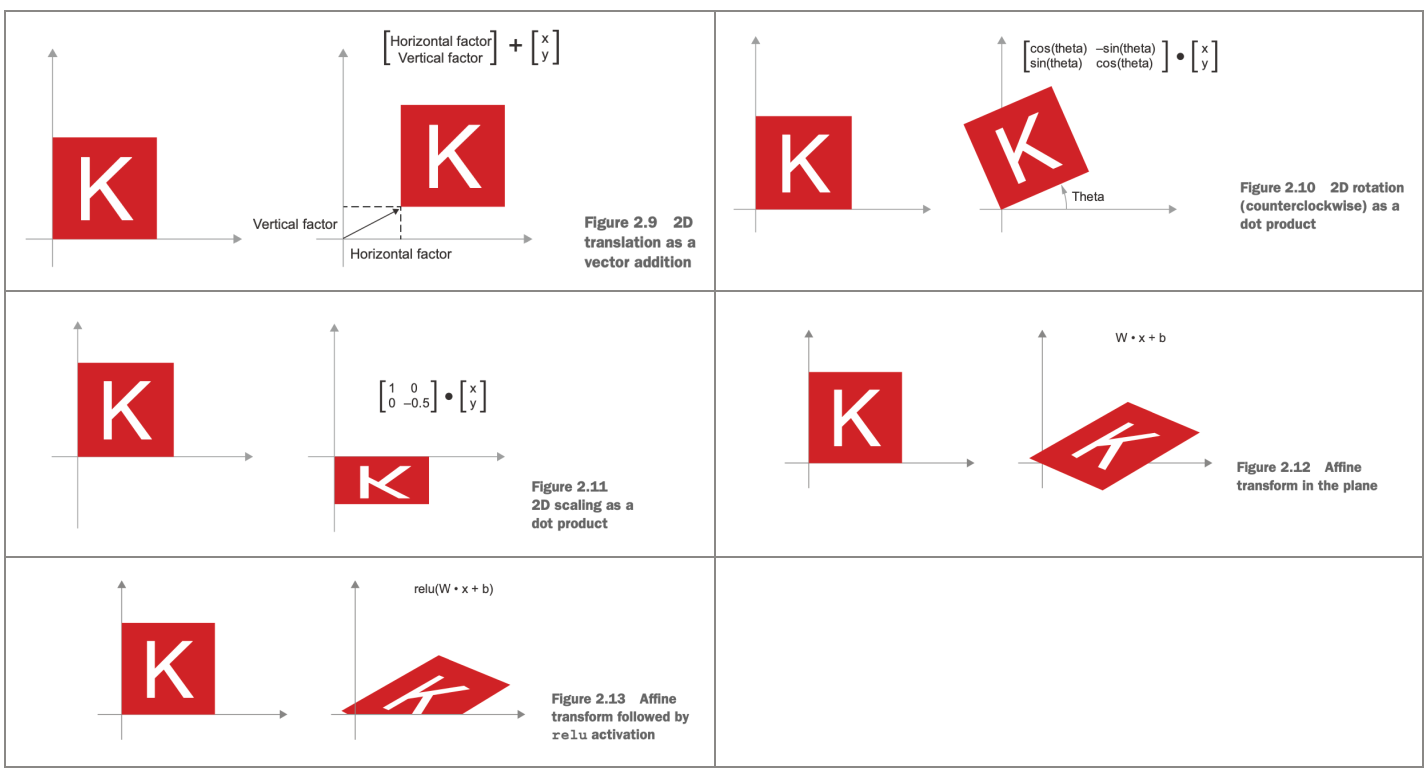

---
# **Gradient**
---

1. Derivative of a tensor function
2. In 2D plane, gradient represents slope
3. In 3D plane, gradient represents curvature of surface
4. Function's minimum is a point where its derivative is 0

---
# **Training**
---


**Process:**
1. Get a batch of train images and labels
2. Initialize weight and bias
3. Forward Propagation:
  - Find prediction using activation function, weight, and bias
  - Find prediction loss — SSE/MSE/CE
4. Backward Propagation:
  - Find gradient of prediction loss with respect to weights/bias with optimizer — RmsProp/AdaGrad
  - Update weight and bias by moving them in opposite direction of gradient
  - `weight = past_weight - learn_rate * gradient`

**Activation Function**:
1. ReLU
2. Sigmoid
3. Hyper Tangent
4. Softmax

**Optimizer:**
1. SDG — Stochastic Gradient Descent:
  - Stochastic = Random Batch
  - Problem of Local Minima
2. MSDG — Momentum Stochastic Gradient Descent:
  - `velocity = past_velocity * momentum - learn_rate * gradient`
  - `weight = past_weight - learn_rate * gradient + momentum * velocity`
3. AdaGrad
4. RmsProp

**Back Propagation**
1. An application of chain rule to computation graph
2. TF.GradientTape:
  - Computation Graphs
  - Due to automatic differentiation in TF, backpropagation does not need to be manually calculated

---
# **GradientTape**
---

In [8]:
x = tf.Variable(0.0)
with tf.GradientTape() as tape:
    y = 2 * x + 3
gradient = tape.gradient(y, x)
print(y)
print(gradient)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


2024-01-26 16:12:29.333951: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-26 16:12:29.333967: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-26 16:12:29.333971: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-26 16:12:29.333998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-26 16:12:29.334012: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
w = tf.Variable(tf.random.uniform((3, 3)))
b = tf.Variable(tf.zeros((3,)))
x = tf.random.uniform((3, 3))
with tf.GradientTape() as tape:
    y = tf.matmul(x, w) + b
gradient = tape.gradient(y, [w, b])
print(gradient)

[<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.6111326, 0.6111326, 0.6111326],
       [2.6060057, 2.6060057, 2.6060057],
       [2.033701 , 2.033701 , 2.033701 ]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([3., 3., 3.], dtype=float32)>]


---
# **TensorFlow Implementation**
---

**Batch Generator**

In [10]:
class NaiveBatch:
    # Batch Record
    def __init__(self, images, labels, batch_size):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.n_batch = math.ceil(len(images) / batch_size)

    # Next Batch
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

**Dense Layer**

In [11]:
class NaiveDense:
    # Activation Function, Weight, and Bias
    def __init__(self, input_size, output_size, activation):
        self.w = tf.Variable(tf.random.uniform((input_size, output_size), minval=0, maxval=1e-9))
        self.b = tf.Variable(tf.zeros((output_size,)))
        self.activation = activation

    # Activation
    def __call__(self, input):
        return self.activation(tf.matmul(input, self.w) + self.b)

    # Weight and Bias Getter
    @property
    def weights(self):
        return [self.w, self.b]

**Sequential Model**

In [12]:
class NaiveSequential:
    # Layers
    def __init__(self, layers):
        self.layers = layers

    # Predictions
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    # Weights
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

**Dataset**

In [13]:
mnist = tf.keras.datasets.mnist

# Mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the dataset
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))

# Scale the dataset
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

**Train**

In [14]:
class NaiveTrain:
    def __init__(self):
        self.batch_loss = 0.0
        self.gradients = []
        self.optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

    def train_step(self, model, image_batch, label_batch):
        with tf.GradientTape() as tape:
            # Prediction
            label_predict = model(image_batch)
            # Loss Per Input
            loss = tf.keras.losses.sparse_categorical_crossentropy(label_batch, label_predict)
            # Loss Average
            self.batch_loss = tf.reduce_mean(loss)
        # Gradient
        self.gradients = tape.gradient(self.batch_loss, model.weights)
        # Update weight
        self.optimizer.apply_gradients(zip(self.gradients, model.weights))

    def fit(self, model, images, labels, epochs, batch_size):
        # Epoch Iteration
        for epoch_index in range(epochs):
            naive_batch = NaiveBatch(images, labels, batch_size)
            # Batch Iteration
            print("Epoch:", epoch_index + 1, end=" ")
            for batch_index in range(naive_batch.n_batch):
                image_batch, label_batch = naive_batch.next()
                self.train_step(model, image_batch, label_batch)
            print("Loss: {}".format(self.batch_loss))


# Model
model = NaiveSequential(
    [
        NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
        NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax),
    ]
)

# Fit
naive_train = NaiveTrain()
naive_train.fit(model, train_images, train_labels, epochs=5, batch_size=128)

Epoch: 1 Loss: 2.3026111125946045
Epoch: 2 Loss: 2.302639961242676
Epoch: 3 Loss: 2.302672863006592
Epoch: 4 Loss: 2.302708864212036
Epoch: 5 Loss: 2.3027472496032715


**Predict**